In [3]:
!uv add pdf2docx pytesseract pdf2image pillow

Resolved 154 packages in 2.76s
Prepared 2 packages in 558ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 2 packages in 18ms
 + pdf2image==1.17.0
 + pytesseract==0.3.13


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
from pdf2docx import Converter

pdf_file = "2026\Definite Integration - JEE Main 2026 (Jan).pdf"      # Path to your PDF
docx_file = "2026\Definite Integration - JEE Main 2026 (Jan).docx"   # Output Word file

cv = Converter(pdf_file)
cv.convert(docx_file)
cv.close()

print("PDF successfully converted to DOCX")


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DEANESH\AppData\Local\Temp\ipykernel_25900\4273807971.py:3: SyntaxWarning: invalid escape sequence '\D'
  pdf_file = "2026\Definite Integration - JEE Main 2026 (Jan).pdf"      # Path to your PDF
C:\Users\DEANESH\AppData\Local\Temp\ipykernel_25900\4273807971.py:4: SyntaxWarning: invalid escape sequence '\D'
  docx_file = "2026\Definite Integration - JEE Main 2026 (Jan).docx"   # Output Word file
[INFO] Start to convert 2026\Definite Integration - JEE Main 2026 (Jan).pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 3.04s.


PDF successfully converted to DOCX


In [1]:
import os

# Folder path containing the files
folder_path = r"2026\\"  # Replace with your folder path

# Substring to remove from filenames
substring_to_remove = "- MathonGo"  # Replace with the substring you want to remove

# Walk through folder and subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if substring_to_remove in filename:
            old_file_path = os.path.join(root, filename)
            new_filename = filename.replace(substring_to_remove, "")
            new_file_path = os.path.join(root, new_filename)
            
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: "{old_file_path}" -> "{new_file_path}"')
        else:
            # Skip files that do not contain the substring
            print(f'Skipped: "{filename}" (substring not found)')

print("All done!")


Renamed: "2026\\Chemistry\Alcohols Phenols and Ethers - JEE Main 2026 (Jan) - MathonGo.pdf" -> "2026\\Chemistry\Alcohols Phenols and Ethers - JEE Main 2026 (Jan) .pdf"
Renamed: "2026\\Chemistry\Aldehydes and Ketones - JEE Main 2026 (Jan) - MathonGo.pdf" -> "2026\\Chemistry\Aldehydes and Ketones - JEE Main 2026 (Jan) .pdf"
Renamed: "2026\\Chemistry\Amines - JEE Main 2026 (Jan) - MathonGo.pdf" -> "2026\\Chemistry\Amines - JEE Main 2026 (Jan) .pdf"
Renamed: "2026\\Chemistry\Biomolecules - JEE Main 2026 (Jan) - MathonGo.pdf" -> "2026\\Chemistry\Biomolecules - JEE Main 2026 (Jan) .pdf"
Renamed: "2026\\Chemistry\Carboxylic Acid Derivatives - JEE Main 2026 (Jan) - MathonGo.pdf" -> "2026\\Chemistry\Carboxylic Acid Derivatives - JEE Main 2026 (Jan) .pdf"
Renamed: "2026\\Chemistry\Chemical Bonding and Molecular Structure - JEE Main 2026 (Jan) - MathonGo.pdf" -> "2026\\Chemistry\Chemical Bonding and Molecular Structure - JEE Main 2026 (Jan) .pdf"
Renamed: "2026\\Chemistry\Chemical Equilibrium - J

In [2]:
!uv add PyPDF2 pdfplumber

Resolved 177 packages in 3.00s
Prepared 5 packages in 3.10s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 5 packages in 208ms
 + cryptography==46.0.5
 + pdfminer-six==20251230
 + pdfplumber==0.11.9
 + pypdf2==3.0.1
 + pypdfium2==5.4.0


In [4]:
import os
import re
import pandas as pd
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

def extract_chapter_name(pdf_filename):
    """
    Extract chapter name from PDF filename by removing the suffix
    """
    filename = str(pdf_filename)
    
    # Remove .pdf extension
    if filename.lower().endswith('.pdf'):
        filename = filename[:-4]
    
    # Patterns to remove
    patterns_to_remove = [
        r'\s*-\s*JEE\s*Main\s*2026\s*\(Jan\)\s*\.?',
        r'\s*-\s*JEE\s*Main\s*2026\s*\(January\)',
        r'\s*-\s*JEE\s*Main\s*2026',
        r'\s*_JEE\s*Main\s*2026\s*\(Jan\)',
        r'\s*JEE\s*Main\s*2026\s*\(Jan\)',
        r'\s*\(JEE\s*Main\s*2026\)',
    ]
    
    chapter = filename.strip()
    for pattern in patterns_to_remove:
        chapter = re.sub(pattern, '', chapter, flags=re.IGNORECASE).strip()
    
    # Remove trailing spaces and dots
    chapter = re.sub(r'\s+$', '', chapter)
    chapter = re.sub(r'\.$', '', chapter)
    
    return chapter if chapter else filename

def extract_text_from_pdf(pdf_path):
    """
    Extract text from PDF file
    """
    try:
        # Try PyPDF2 first
        try:
            import PyPDF2
            with open(pdf_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                text = ""
                for page in pdf_reader.pages:
                    text += page.extract_text()
            return text
        except:
            pass
        
        # Try pdfplumber
        try:
            import pdfplumber
            with pdfplumber.open(pdf_path) as pdf:
                text = ""
                for page in pdf.pages:
                    text += page.extract_text()
            return text
        except:
            pass
        
        # Try pymupdf
        try:
            import fitz
            text = ""
            doc = fitz.open(pdf_path)
            for page in doc:
                text += page.get_text()
            return text
        except:
            pass
        
        # If all fail, try reading as text (might be a text file renamed as PDF)
        try:
            with open(pdf_path, 'r', encoding='utf-8', errors='ignore') as f:
                return f.read()
        except:
            with open(pdf_path, 'rb') as f:
                return str(f.read())
                
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return ""

def parse_questions_from_text(text, filename):
    """
    Parse text to count questions per shift
    """
    # Define all possible shifts
    all_shifts = [
        '21 January Shift 1',
        '21 January Shift 2', 
        '22 January Shift 1',
        '22 January Shift 2',
        '23 January Shift 1',
        '23 January Shift 2',
        '24 January Shift 1',
        '24 January Shift 2',
        '28 January Shift 1',
        '28 January Shift 2'
    ]
    
    # Initialize count dictionary
    shift_counts = {shift: 0 for shift in all_shifts}
    
    if not text:
        return shift_counts
    
    # Convert to string and clean
    text_str = str(text)
    
    # Pattern 1: Direct question shift patterns
    # Matches: Q1.21 January Shift 1, ## Q2.22 January Shift 2, 1.23 January Shift 1, Q3.24 January Shift 1
    patterns = [
        r'Q?\d+\.\s*(\d+\s+January\s+Shift\s+\d+)',  # Q1.21 January Shift 1
        r'##\s*Q?\d+\.\s*(\d+\s+January\s+Shift\s+\d+)',  ## Q2.22 January Shift 2
        r'^\d+\.\s*(\d+\s+January\s+Shift\s+\d+)',  # 1.22 January Shift 1 (at start of line)
        r'Question\s*\d+\.\s*(\d+\s+January\s+Shift\s+\d+)',  # Question 1.21 January Shift 1
        r'\(\d+\)\s*(\d+\s+January\s+Shift\s+\d+)',  # (1) 21 January Shift 1
    ]
    
    # Also look for shift mentions without question numbers
    shift_pattern = r'(\d+\s+January\s+Shift\s+\d+)'
    
    # First, try to find all shift mentions
    all_shift_mentions = re.findall(shift_pattern, text_str, re.IGNORECASE)
    
    # Count each shift mention
    for shift_mention in all_shift_mentions:
        # Clean the shift mention
        shift_mention = shift_mention.strip()
        
        # Standardize the format
        shift_mention = re.sub(r'\s+', ' ', shift_mention)  # Remove extra spaces
        shift_mention = shift_mention.title()  # Capitalize properly
        
        # Check if it matches any of our defined shifts
        for shift in all_shifts:
            if shift.lower() == shift_mention.lower():
                shift_counts[shift] += 1
                break
    
    # If no shifts found with direct pattern, look for patterns like "21 Jan Shift 1"
    if sum(shift_counts.values()) == 0:
        alt_patterns = [
            r'(\d+\s+Jan\s+Shift\s+\d+)',
            r'(\d+\s+January\s+Sh\s+\d+)',
            r'Shift\s+(\d+\s+January)\s+(\d+)',
        ]
        
        for pattern in alt_patterns:
            matches = re.findall(pattern, text_str, re.IGNORECASE)
            for match in matches:
                if isinstance(match, tuple):
                    # Handle tuple matches like ('21 January', '1')
                    date, shift_num = match
                    shift_str = f"{date} Shift {shift_num}"
                else:
                    # Handle string matches
                    shift_str = match
                    # Convert "21 Jan Shift 1" to "21 January Shift 1"
                    shift_str = re.sub(r'Jan\b', 'January', shift_str, flags=re.IGNORECASE)
                
                shift_str = shift_str.title()
                for shift in all_shifts:
                    if shift.lower() == shift_str.lower():
                        shift_counts[shift] += 1
                        break
    
    # If still no shifts found, check filename for shift info
    if sum(shift_counts.values()) == 0:
        filename_lower = filename.lower()
        for shift in all_shifts:
            shift_lower = shift.lower()
            # Check if shift is in filename
            if any(part in filename_lower for part in shift_lower.split()):
                # Default to 1 question if shift mentioned in filename
                shift_counts[shift] = 1
    
    return shift_counts

def analyze_pdfs(year_folder):
    """
    Analyze all PDFs and count questions per shift per chapter
    """
    subjects = ['Maths', 'Physics', 'Chemistry']
    
    # Define all shifts
    all_shifts = [
        '21 January Shift 1',
        '21 January Shift 2',
        '22 January Shift 1',
        '22 January Shift 2', 
        '23 January Shift 1',
        '23 January Shift 2',
        '24 January Shift 1',
        '24 January Shift 2',
        '28 January Shift 1',
        '28 January Shift 2'
    ]
    
    # Initialize data structure
    data = {subject: defaultdict(lambda: defaultdict(int)) for subject in subjects}
    
    print("=" * 80)
    print("JEE MAINS 2026 JANUARY - QUESTION DISTRIBUTION ANALYSIS")
    print("=" * 80)
    
    for subject in subjects:
        subject_folder = os.path.join(year_folder, subject)
        
        if not os.path.exists(subject_folder):
            print(f"\n❌ Folder not found: {subject_folder}")
            continue
        
        print(f"\n📚 Processing {subject}...")
        print("-" * 60)
        
        # Get all PDF files
        pdf_files = []
        for root, dirs, files in os.walk(subject_folder):
            for file in files:
                if file.lower().endswith('.pdf'):
                    pdf_files.append((root, file))
        
        print(f"Found {len(pdf_files)} PDF files")
        
        for root, filename in pdf_files:
            pdf_path = os.path.join(root, filename)
            
            # Extract chapter name
            chapter_name = extract_chapter_name(filename)
            
            # Extract text from PDF
            text = extract_text_from_pdf(pdf_path)
            
            if not text:
                print(f"  ⚠️  Could not read: {filename}")
                continue
            
            # Parse questions and count by shift
            shift_counts = parse_questions_from_text(text, filename)
            
            # Store the counts
            for shift, count in shift_counts.items():
                if count > 0:
                    data[subject][chapter_name][shift] = count
            
            # Print summary for this file
            total_questions = sum(shift_counts.values())
            if total_questions > 0:
                shifts_with_questions = [shift for shift, count in shift_counts.items() if count > 0]
                print(f"  ✓ {chapter_name:40} → {total_questions:2} questions in {len(shifts_with_questions)} shifts")
                for shift in shifts_with_questions:
                    print(f"      • {shift}: {shift_counts[shift]} question(s)")
            else:
                print(f"  ✗ {chapter_name:40} → No shifts identified")
    
    return data, all_shifts

def create_excel_with_total(data, all_shifts, output_filename):
    """
    Create Excel file with Total column
    """
    print(f"\n📊 Creating Excel file: {output_filename}")
    
    with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
        for subject in ['Maths', 'Physics', 'Chemistry']:
            if subject not in data or not data[subject]:
                # Create empty dataframe
                columns = ['Chapter Name'] + all_shifts + ['Total']
                df = pd.DataFrame(columns=columns)
                df.to_excel(writer, sheet_name=subject, index=False)
                continue
            
            # Prepare data for this subject
            rows = []
            for chapter, shift_counts in data[subject].items():
                row = {'Chapter Name': chapter}
                total = 0
                
                # Add counts for each shift
                for shift in all_shifts:
                    count = shift_counts.get(shift, 0)
                    row[shift] = count
                    total += count
                
                # Add total column
                row['Total'] = total
                rows.append(row)
            
            # Create DataFrame and sort by Chapter Name
            df = pd.DataFrame(rows)
            df = df.sort_values('Chapter Name', key=lambda col: col.str.lower())
            
            # Reorder columns: Chapter Name, then all shifts, then Total
            columns = ['Chapter Name'] + all_shifts + ['Total']
            df = df[columns]
            
            # Write to Excel
            df.to_excel(writer, sheet_name=subject, index=False)
            
            # Auto-adjust column widths
            worksheet = writer.sheets[subject]
            for column in worksheet.columns:
                max_length = 0
                column_letter = column[0].column_letter
                for cell in column:
                    try:
                        cell_value = str(cell.value)
                        if len(cell_value) > max_length:
                            max_length = len(cell_value)
                    except:
                        pass
                # Different width for Chapter Name vs shift columns
                if column_letter == 'A':  # Chapter Name column
                    adjusted_width = min(max_length + 2, 50)
                else:
                    adjusted_width = min(max_length + 2, 20)
                worksheet.column_dimensions[column_letter].width = adjusted_width
            
            print(f"  ✓ {subject:10} → {len(df)} chapters, {df['Total'].sum()} total questions")
    
    print(f"\n✅ Excel file saved: {output_filename}")

def print_detailed_summary(data, all_shifts):
    """
    Print detailed summary statistics
    """
    print("\n" + "=" * 80)
    print("DETAILED SUMMARY")
    print("=" * 80)
    
    for subject in ['Maths', 'Physics', 'Chemistry']:
        if subject in data and data[subject]:
            chapters = list(data[subject].keys())
            total_questions = 0
            shift_totals = {shift: 0 for shift in all_shifts}
            
            # Calculate totals
            for chapter, shift_counts in data[subject].items():
                for shift, count in shift_counts.items():
                    shift_totals[shift] += count
                    total_questions += count
            
            print(f"\n{subject}:")
            print(f"  • Chapters: {len(chapters)}")
            print(f"  • Total Questions: {total_questions}")
            
            # Print distribution by shift
            print("  • Questions per shift:")
            for shift in all_shifts:
                count = shift_totals[shift]
                if count > 0:
                    print(f"      {shift:25} → {count:3} questions")
            
            # Print chapters with most questions
            chapter_totals = []
            for chapter, shift_counts in data[subject].items():
                chapter_total = sum(shift_counts.values())
                chapter_totals.append((chapter, chapter_total))
            
            # Sort by total questions (descending)
            chapter_totals.sort(key=lambda x: x[1], reverse=True)
            
            print(f"\n  • Top 5 chapters by question count:")
            for i, (chapter, total) in enumerate(chapter_totals[:5]):
                print(f"      {i+1}. {chapter:35} → {total:2} questions")
    
    print("\n" + "=" * 80)

def main():
    """
    Main execution function
    """
    # Check for required packages
    required_packages = ['pandas', 'openpyxl']
    
    print("Checking required packages...")
    for package in required_packages:
        try:
            __import__(package)
            print(f"  ✓ {package}")
        except ImportError:
            print(f"  ✗ {package} not found. Installing...")
            import subprocess
            subprocess.check_call(['pip', 'install', package])
    
    print("\nPDF parsing libraries (need at least one):")
    pdf_libs = ['PyPDF2', 'pdfplumber', 'pymupdf']
    found_lib = False
    
    for lib in pdf_libs:
        try:
            if lib == 'pymupdf':
                __import__('fitz')
            else:
                __import__(lib)
            print(f"  ✓ {lib}")
            found_lib = True
        except ImportError:
            print(f"  ✗ {lib}")
    
    if not found_lib:
        print("\n⚠️  No PDF library found. Installing PyPDF2...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'PyPDF2'])
    
    # Get year folder path
    year_folder = input("\nEnter path to 2026 folder (or press Enter for '2026'): ").strip()
    if not year_folder:
        year_folder = "2026"
    
    # Check if folder exists
    if not os.path.exists(year_folder):
        print(f"\n❌ Error: Folder '{year_folder}' not found!")
        print("\nExpected structure:")
        print("2026/")
        print("  ├── Maths/ (with PDF files)")
        print("  ├── Physics/ (with PDF files)")
        print("  └── Chemistry/ (with PDF files)")
        return
    
    print(f"\n📁 Analyzing folder: {os.path.abspath(year_folder)}")
    
    # Analyze PDFs
    data, all_shifts = analyze_pdfs(year_folder)
    
    # Create Excel file
    output_filename = "JEE-Mains-2026-Jan-Questions-Classification.xlsx"
    create_excel_with_total(data, all_shifts, output_filename)
    
    # Print summary
    print_detailed_summary(data, all_shifts)
    
    # Show sample of what to expect
    print("\n📋 EXPECTED OUTPUT STRUCTURE:")
    print("-" * 60)
    print("Each PDF file contains questions from multiple shifts.")
    print("The Excel file will show:")
    print("  • Chapter Name")
    print("  • Count of questions for each shift (0 if no questions)")
    print("  • Total questions for that chapter")
    
    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETE!")
    print("=" * 80)

if __name__ == "__main__":
    main()

Checking required packages...
  ✓ pandas
  ✓ openpyxl

PDF parsing libraries (need at least one):
  ✓ PyPDF2
  ✓ pdfplumber
  ✓ pymupdf

📁 Analyzing folder: e:\ML-Wakad-Weekdays-5-7-pm-11th-Dec\JEE-Mains\Question-Papers\2026
JEE MAINS 2026 JANUARY - QUESTION DISTRIBUTION ANALYSIS

📚 Processing Maths...
------------------------------------------------------------
Found 31 PDF files
  ✓ Application of Derivatives               →  6 questions in 6 shifts
      • 21 January Shift 1: 1 question(s)
      • 21 January Shift 2: 1 question(s)
      • 22 January Shift 1: 1 question(s)
      • 24 January Shift 1: 1 question(s)
      • 24 January Shift 2: 1 question(s)
      • 28 January Shift 2: 1 question(s)
  ✓ Area Under Curves                        → 10 questions in 10 shifts
      • 21 January Shift 1: 1 question(s)
      • 21 January Shift 2: 1 question(s)
      • 22 January Shift 1: 1 question(s)
      • 22 January Shift 2: 1 question(s)
      • 23 January Shift 1: 1 question(s)
      • 2

📁 Current directory contents:
 Volume in drive E is New Volume
 Volume Serial Number is D494-DE3A

 Directory of e:\ML-Wakad-Weekdays-5-7-pm-11th-Dec\JEE-Mains\Question-Papers

11-02-2026  01:55            14,847 JEE-Mains-2026-Jan-Questions-Classification.xlsx

 Directory of e:\ML-Wakad-Weekdays-5-7-pm-11th-Dec\JEE-Mains\Question-Papers

               1 File(s)         14,847 bytes
               0 Dir(s)  94,938,394,624 bytes free
📊 JEE MAINS 2026 - CSV FILE CREATOR
📂 Reading Excel file: JEE-Mains-2026-Jan-Questions-Classification.xlsx

📋 Sheets found in Excel file:
  1. Maths
  2. Physics
  3. Chemistry

CREATING CSV FILES
✅ Maths     
   → File: JEE-Mains-2026-Jan-Maths.csv
   → Chapters: 31
   → Total Questions: 250
   → Preview of first 3 rows:


,Chapter Name,21 January Shift 1,21 January Shift 2,22 January Shift 1,22 January Shift 2,23 January Shift 1,23 January Shift 2,24 January Shift 1,24 January Shift 2,28 January Shift 1,28 January Shift 2,Total
0,Application of Derivatives,1,1,1,0,0,0,1,1,0,1,6
1,Area Under Curves,1,1,1,1,1,1,1,1,1,1,10
2,Basic of Mathematics,0,0,0,0,0,0,1,0,0,0,1



✅ Physics   
   → File: JEE-Mains-2026-Jan-Physics.csv
   → Chapters: 31
   → Total Questions: 250
   → Preview of first 3 rows:


,Chapter Name,21 January Shift 1,21 January Shift 2,22 January Shift 1,22 January Shift 2,23 January Shift 1,23 January Shift 2,24 January Shift 1,24 January Shift 2,28 January Shift 1,28 January Shift 2,Total
0,Alternating Current,0,1,0,0,1,0,1,0,1,1,5
1,Atomic Physics,1,1,0,1,1,0,1,0,0,0,5
2,Capacitance,1,1,0,1,1,1,0,1,0,1,7



✅ Chemistry 
   → File: JEE-Mains-2026-Jan-Chemistry.csv
   → Chapters: 24
   → Total Questions: 250
   → Preview of first 3 rows:


,Chapter Name,21 January Shift 1,21 January Shift 2,22 January Shift 1,22 January Shift 2,23 January Shift 1,23 January Shift 2,24 January Shift 1,24 January Shift 2,28 January Shift 1,28 January Shift 2,Total
0,Alcohols Phenols and Ethers,0,0,1,1,2,1,2,2,1,1,11
1,Aldehydes and Ketones,1,1,1,1,1,2,0,1,1,0,9
2,Amines,3,1,1,2,2,2,1,2,2,2,18



📋 SUMMARY
✅ Successfully created 3 CSV files:
   • JEE-Mains-2026-Jan-Maths.csv (1.5 KB)
   • JEE-Mains-2026-Jan-Physics.csv (1.5 KB)
   • JEE-Mains-2026-Jan-Chemistry.csv (1.3 KB)

📈 CSV FILE ANALYSIS

📊 Maths:
   Total Chapters: 31
   Shift Columns: 10
   Total Questions: 250

   Questions per shift:
     • 21 January Shift 1: 25
     • 21 January Shift 2: 25
     • 22 January Shift 1: 25
     • 22 January Shift 2: 25
     • 23 January Shift 1: 25
     • 23 January Shift 2: 25
     • 24 January Shift 1: 25
     • 24 January Shift 2: 25
     • 28 January Shift 1: 25
     • 28 January Shift 2: 25

📊 Physics:
   Total Chapters: 31
   Shift Columns: 10
   Total Questions: 250

   Questions per shift:
     • 21 January Shift 1: 25
     • 21 January Shift 2: 25
     • 22 January Shift 1: 25
     • 22 January Shift 2: 25
     • 23 January Shift 1: 25
     • 23 January Shift 2: 25
     • 24 January Shift 1: 25
     • 24 January Shift 2: 25
     • 28 January Shift 1: 25
     • 28 January Shi

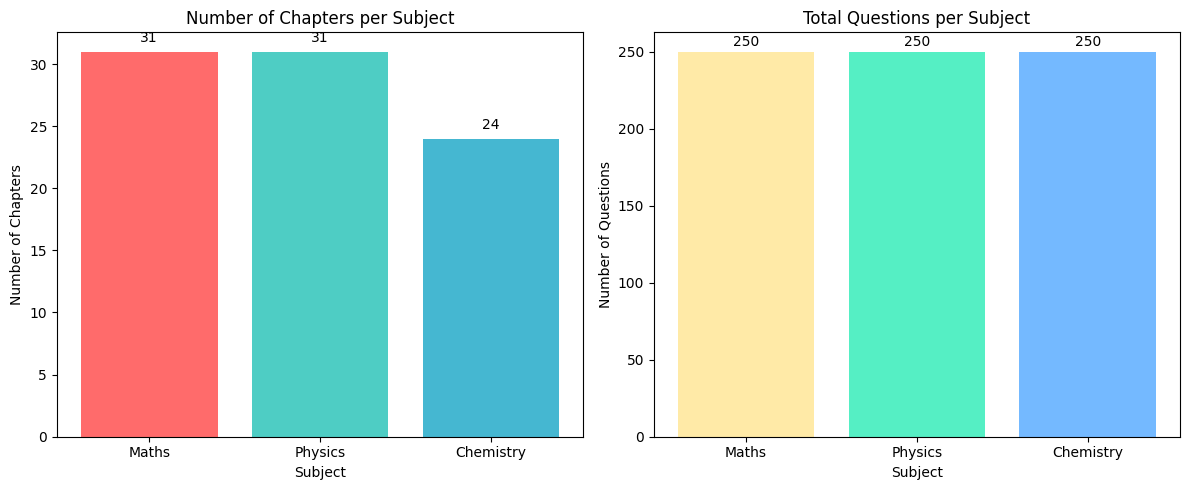


📋 Summary Table:


,Subject,Chapters,Total Questions,Avg Questions/Chapter
0,Maths,31,250,8.064516
1,Physics,31,250,8.064516
2,Chemistry,24,250,10.416667


'\nQUICK START INSTRUCTIONS:\n\n1. Make sure your Excel file is in the same directory as this notebook\n2. The Excel file should be named: "JEE-Mains-2026-Jan-Questions-Classification.xlsx"\n3. If your file has a different name, modify the \'excel_file\' variable above\n4. Run all cells or just run the main execution cell\n\nExpected Output:\n✅ 3 CSV files will be created:\n   - JEE-Mains-2026-Jan-Maths.csv\n   - JEE-Mains-2026-Jan-Physics.csv\n   - JEE-Mains-2026-Jan-Chemistry.csv\n\nEach CSV file will have:\n   • Chapter Name column\n   • Columns for each shift (21 January Shift 1, etc.)\n   • Total column with sum of all shifts\n'

In [5]:
# Install required packages if needed
# Uncomment and run if you don't have these packages installed
# !pip install pandas openpyxl

import pandas as pd
import os
from IPython.display import display, HTML

def create_jee_csv_files(excel_file_path="JEE-Mains-2026-Jan-Questions-Classification.xlsx"):
    """
    Create 3 separate CSV files from the JEE Mains Excel file.
    
    Parameters:
    excel_file_path (str): Path to the Excel file. Default is "JEE-Mains-2026-Jan-Questions-Classification.xlsx"
    """
    
    print("📊 JEE MAINS 2026 - CSV FILE CREATOR")
    print("=" * 60)
    
    # Check if file exists
    if not os.path.exists(excel_file_path):
        print(f"❌ Error: File '{excel_file_path}' not found!")
        print("\nAvailable files in current directory:")
        files = [f for f in os.listdir('.') if f.endswith(('.xlsx', '.xls'))]
        if files:
            for f in files:
                print(f"  • {f}")
            return
        else:
            print("  No Excel files found.")
            return
    
    print(f"📂 Reading Excel file: {excel_file_path}")
    
    # Read the Excel file
    try:
        excel_file = pd.ExcelFile(excel_file_path)
        sheet_names = excel_file.sheet_names
        
        print(f"\n📋 Sheets found in Excel file:")
        for i, sheet in enumerate(sheet_names, 1):
            print(f"  {i}. {sheet}")
        
    except Exception as e:
        print(f"❌ Error reading Excel file: {e}")
        return
    
    # Define subject mapping
    subjects = {
        'Maths': 'JEE-Mains-2026-Jan-Maths.csv',
        'Physics': 'JEE-Mains-2026-Jan-Physics.csv',
        'Chemistry': 'JEE-Mains-2026-Jan-Chemistry.csv'
    }
    
    print("\n" + "=" * 60)
    print("CREATING CSV FILES")
    print("=" * 60)
    
    created_files = []
    
    for subject, csv_filename in subjects.items():
        try:
            # Check if sheet exists
            if subject not in sheet_names:
                print(f"⚠️  Sheet '{subject}' not found in Excel file. Skipping...")
                continue
            
            # Read the sheet
            df = pd.read_excel(excel_file_path, sheet_name=subject)
            
            # Add Total column if shift columns exist
            shift_columns = [col for col in df.columns if 'Shift' in str(col)]
            if shift_columns:
                df['Total'] = df[shift_columns].sum(axis=1)
            
            # Save to CSV
            df.to_csv(csv_filename, index=False, encoding='utf-8')
            
            # Calculate statistics
            total_chapters = len(df)
            total_questions = df['Total'].sum() if 'Total' in df.columns else 0
            
            created_files.append(csv_filename)
            
            print(f"✅ {subject:10}")
            print(f"   → File: {csv_filename}")
            print(f"   → Chapters: {total_chapters}")
            print(f"   → Total Questions: {total_questions}")
            print(f"   → Preview of first 3 rows:")
            display(df.head(3))
            print()
            
        except Exception as e:
            print(f"❌ Error processing {subject}: {e}")
            continue
    
    # Summary
    print("=" * 60)
    print("📋 SUMMARY")
    print("=" * 60)
    
    if created_files:
        print(f"✅ Successfully created {len(created_files)} CSV files:")
        for file in created_files:
            if os.path.exists(file):
                file_size_kb = os.path.getsize(file) / 1024
                print(f"   • {file} ({file_size_kb:.1f} KB)")
    else:
        print("❌ No CSV files were created.")
    
    return created_files

def analyze_csv_files():
    """
    Analyze the created CSV files
    """
    print("\n📈 CSV FILE ANALYSIS")
    print("=" * 60)
    
    csv_files = [
        'JEE-Mains-2026-Jan-Maths.csv',
        'JEE-Mains-2026-Jan-Physics.csv',
        'JEE-Mains-2026-Jan-Chemistry.csv'
    ]
    
    for csv_file in csv_files:
        if os.path.exists(csv_file):
            try:
                df = pd.read_csv(csv_file)
                subject = csv_file.split('-')[-1].split('.')[0]
                
                print(f"\n📊 {subject}:")
                print(f"   Total Chapters: {len(df)}")
                
                # Count shift columns
                shift_cols = [col for col in df.columns if 'Shift' in str(col)]
                print(f"   Shift Columns: {len(shift_cols)}")
                
                if 'Total' in df.columns:
                    print(f"   Total Questions: {df['Total'].sum()}")
                
                # Show distribution of questions
                if shift_cols:
                    shift_totals = df[shift_cols].sum()
                    print(f"\n   Questions per shift:")
                    for shift, total in shift_totals.items():
                        if total > 0:
                            print(f"     • {shift}: {total}")
                
            except Exception as e:
                print(f"❌ Error reading {csv_file}: {e}")
        else:
            print(f"⚠️  {csv_file} not found")

def create_visual_summary():
    """
    Create a visual summary of the data
    """
    print("\n📊 VISUAL SUMMARY")
    print("=" * 60)
    
    import matplotlib.pyplot as plt
    
    subjects = ['Maths', 'Physics', 'Chemistry']
    subject_data = {}
    
    # Collect data
    for subject in subjects:
        csv_file = f'JEE-Mains-2026-Jan-{subject}.csv'
        if os.path.exists(csv_file):
            df = pd.read_csv(csv_file)
            subject_data[subject] = {
                'chapters': len(df),
                'total_questions': df['Total'].sum() if 'Total' in df.columns else 0
            }
    
    if not subject_data:
        print("No CSV files found for visualization")
        return
    
    # Create bar chart
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Chart 1: Number of chapters per subject
    subjects_list = list(subject_data.keys())
    chapters_list = [subject_data[s]['chapters'] for s in subjects_list]
    
    axes[0].bar(subjects_list, chapters_list, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    axes[0].set_title('Number of Chapters per Subject')
    axes[0].set_ylabel('Number of Chapters')
    axes[0].set_xlabel('Subject')
    
    # Add value labels on bars
    for i, v in enumerate(chapters_list):
        axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    # Chart 2: Total questions per subject
    questions_list = [subject_data[s]['total_questions'] for s in subjects_list]
    
    axes[1].bar(subjects_list, questions_list, color=['#FFEAA7', '#55EFC4', '#74B9FF'])
    axes[1].set_title('Total Questions per Subject')
    axes[1].set_ylabel('Number of Questions')
    axes[1].set_xlabel('Subject')
    
    # Add value labels on bars
    for i, v in enumerate(questions_list):
        axes[1].text(i, v + 2, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Create a summary table
    print("\n📋 Summary Table:")
    summary_df = pd.DataFrame({
        'Subject': subjects_list,
        'Chapters': chapters_list,
        'Total Questions': questions_list,
        'Avg Questions/Chapter': [q/c if c > 0 else 0 for q, c in zip(questions_list, chapters_list)]
    })
    
    display(summary_df)

# ==============================================
# EXECUTE THE CODE
# ==============================================

# First, check current directory
print("📁 Current directory contents:")
!dir *.xlsx *.csv 2>nul || ls *.xlsx *.csv 2>/dev/null || echo "No Excel or CSV files found"

# Option 1: Use default file name (uncomment if needed)
# csv_files = create_jee_csv_files()

# Option 2: Specify your Excel file path
# Replace with your actual file path if different
excel_file = "JEE-Mains-2026-Jan-Questions-Classification.xlsx"

# Create CSV files
csv_files = create_jee_csv_files(excel_file)

# Analyze the created CSV files
if csv_files:
    analyze_csv_files()
    
    # Create visual summary
    try:
        create_visual_summary()
    except Exception as e:
        print(f"Note: Visualizations require matplotlib. Error: {e}")
        print("To install matplotlib, run: !pip install matplotlib")
else:
    print("\n⚠️  No CSV files were created. Please check the Excel file path.")

# ==============================================
# BONUS: Additional analysis functions
# ==============================================

def find_top_chapters(subject='Maths', n=10):
    """
    Find top N chapters by number of questions
    """
    csv_file = f'JEE-Mains-2026-Jan-{subject}.csv'
    if not os.path.exists(csv_file):
        print(f"❌ {csv_file} not found")
        return
    
    df = pd.read_csv(csv_file)
    if 'Total' not in df.columns:
        print(f"❌ No 'Total' column in {csv_file}")
        return
    
    top_chapters = df.nlargest(n, 'Total')[['Chapter Name', 'Total']]
    
    print(f"📈 Top {n} Chapters in {subject} by Question Count:")
    display(top_chapters)
    
    # Optional: Create a bar chart
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(10, 6))
        plt.barh(top_chapters['Chapter Name'][::-1], top_chapters['Total'][::-1], color='skyblue')
        plt.xlabel('Number of Questions')
        plt.title(f'Top {n} Chapters in {subject}')
        plt.tight_layout()
        plt.show()
    except:
        pass

def get_shift_analysis(subject='Maths'):
    """
    Analyze question distribution across shifts
    """
    csv_file = f'JEE-Mains-2026-Jan-{subject}.csv'
    if not os.path.exists(csv_file):
        print(f"❌ {csv_file} not found")
        return
    
    df = pd.read_csv(csv_file)
    shift_cols = [col for col in df.columns if 'Shift' in str(col)]
    
    if not shift_cols:
        print(f"❌ No shift columns found in {csv_file}")
        return
    
    shift_totals = df[shift_cols].sum()
    shift_df = pd.DataFrame({
        'Shift': shift_totals.index,
        'Questions': shift_totals.values
    })
    
    print(f"📊 Shift Analysis for {subject}:")
    display(shift_df)
    
    # Calculate percentage
    total = shift_df['Questions'].sum()
    if total > 0:
        shift_df['Percentage'] = (shift_df['Questions'] / total * 100).round(1)
        print(f"\n📈 Percentages:")
        display(shift_df[['Shift', 'Questions', 'Percentage']])

# Example usage of bonus functions (uncomment to run)
# print("\n" + "="*60)
# print("BONUS ANALYSIS")
# print("="*60)

# Find top chapters in Maths
# find_top_chapters('Maths', 5)

# Analyze shift distribution for Physics
# get_shift_analysis('Physics')

# ==============================================
# QUICK START - Run this cell first!
# ==============================================
"""
QUICK START INSTRUCTIONS:

1. Make sure your Excel file is in the same directory as this notebook
2. The Excel file should be named: "JEE-Mains-2026-Jan-Questions-Classification.xlsx"
3. If your file has a different name, modify the 'excel_file' variable above
4. Run all cells or just run the main execution cell

Expected Output:
✅ 3 CSV files will be created:
   - JEE-Mains-2026-Jan-Maths.csv
   - JEE-Mains-2026-Jan-Physics.csv
   - JEE-Mains-2026-Jan-Chemistry.csv

Each CSV file will have:
   • Chapter Name column
   • Columns for each shift (21 January Shift 1, etc.)
   • Total column with sum of all shifts
"""